In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import numpy as np
import re
import plotly as pl 
import matplotlib.pyplot as plt



In [2]:
df_chocolate = pd.read_csv("clean_flavors_of_cacao.csv", encoding='utf-8')
df_chocolate.head()

,Company,Bean_Origin_or_Bar_Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad_Bean_Origin,Ingredients,Most_Memorable_Characteristics,country_code,latitude,longitude,continent
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,missing,Sao Tome & Principe,"4- B,S,C,L","sweet, chocolatey, vegetal",ST,0.186360,6.613081,Africa
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,missing,Togo,"4- B,S,C,L","burnt wood, earthy, choco",TG,8.619543,0.824782,Africa
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,missing,Togo,"4- B,S,C,L","roasty, acidic, nutty",TG,8.619543,0.824782,Africa
3,A. Morin,Akata,1680,2015,70.0,France,3.50,missing,Togo,"4- B,S,C,L","mild profile, chocolaty, spice",TG,8.619543,0.824782,Africa
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,missing,Peru,"4- B,S,C,L","grainy texture, cocoa, sweet",PE,-9.189967,-75.015152,South America


# Answering Questions

## What is each country share of Cocoa Production?

In [5]:
countries=df_chocolate['Broad_Bean_Origin'].value_counts().index.tolist()[:5]
countries

['Venezuela', 'Ecuador', 'Dominican Republic', 'Madagascar', 'Peru']

In [6]:
import plotly.express as px
fig = px.pie(df_chocolate.head(200),names='Broad_Bean_Origin')
fig.show()

### We could see among the top 150 countries that produce chocolate, the top 5 positions are occupied by Peru, Venezuela, Ecuador, Madagascar and Brazil respectively.

## Where are the best cocoa beans grown?

In [7]:
Broad_Bean_Origin_mean = df_chocolate.groupby('Broad_Bean_Origin').mean().reset_index().sort_values('Rating',ascending = False)
Broad_Bean_Origin_mean.head()

,Broad_Bean_Origin,REF,Review_Date,Cocoa_Percent,Rating,latitude,longitude
43,Solomon Islands,1811.000000,2016.250000,74.000000,3.437500,-9.645710,160.156194
17,Haiti,1354.444444,2014.000000,71.333333,3.388889,18.971187,-72.285215
19,Honduras,1463.176471,2014.470588,74.058824,3.352941,15.199999,-86.241905
16,Guatemala,1292.774194,2013.580645,71.483871,3.330645,15.783471,-90.230759
39,Republic of Congo,1091.600000,2012.600000,70.500000,3.325000,-0.228021,15.827659


In [8]:
best_beans_grown = Broad_Bean_Origin_mean[Broad_Bean_Origin_mean['Rating'] >= 3.25]
best_beans_grown.head()

,Broad_Bean_Origin,REF,Review_Date,Cocoa_Percent,Rating,latitude,longitude
43,Solomon Islands,1811.000000,2016.250000,74.000000,3.437500,-9.645710,160.156194
17,Haiti,1354.444444,2014.000000,71.333333,3.388889,18.971187,-72.285215
19,Honduras,1463.176471,2014.470588,74.058824,3.352941,15.199999,-86.241905
16,Guatemala,1292.774194,2013.580645,71.483871,3.330645,15.783471,-90.230759
39,Republic of Congo,1091.600000,2012.600000,70.500000,3.325000,-0.228021,15.827659


In [9]:
best_beans_grown.Broad_Bean_Origin.tolist()

['Solomon Islands',
 'Haiti',
 'Honduras',
 'Guatemala',
 'Republic of Congo',
 'Vietnam',
 'Brazil',
 'Papua New Guinea',
 'Gabon',
 'Vanuatu',
 'Suriname',
 'Nigeria',
 'Malaysia',
 'Australia',
 'Cameroon',
 'Cuba']

In [10]:
Max_Bean_Origin = df_chocolate.groupby(['Broad_Bean_Origin'])['Rating'].max()

In [11]:
Max_Bean_Origin.sort_values(ascending = False)[:20]

Broad_Bean_Origin
Venezuela              5.0
Unknown                5.0
Mexico                 4.0
Guatemala              4.0
Trinidad Tobago        4.0
Sao Tome & Principe    4.0
Saint Lucia            4.0
Peru                   4.0
Papua New Guinea       4.0
Other                  4.0
Nicaragua              4.0
Belize                 4.0
Madagascar             4.0
Jamaica                4.0
Indonesia              4.0
Haiti                  4.0
Vietnam                4.0
Grenada                4.0
Bolivia                4.0
Ghana                  4.0
Name: Rating, dtype: float64

## Which countries produce the highest-rated bars?

In [12]:
company_location=df_chocolate['Company_Location'].value_counts().index.tolist()

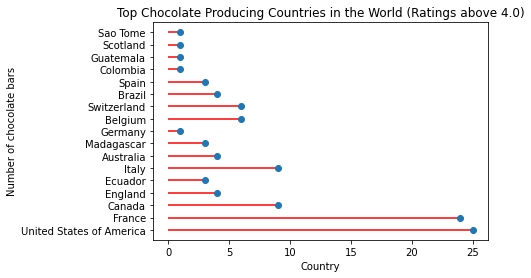

{'United States of America': 25, 'France': 24, 'Canada': 9, 'England': 4, 'Ecuador': 3, 'Italy': 9, 'Australia': 4, 'Madagascar': 3, 'Germany': 1, 'Belgium': 6, 'Switzerland': 6, 'Brazil': 4, 'Spain': 3, 'Colombia': 1, 'Guatemala': 1, 'Scotland': 1, 'Sao Tome': 1}


In [13]:
best_choc={}
for cl in company_location:
    c=0
    b=df_chocolate[df_chocolate['Company_Location']==cl]
    br=b[b['Rating']>=4]
    for i in br['Rating']:
        
        c+=1
        best_choc[cl]=c
li=best_choc.keys()


# The lollipop plot
plt.hlines(y=li,xmin=0,xmax=best_choc.values(),color='red')
plt.plot(best_choc.values(),li,"o")
plt.xlabel('Country')
plt.ylabel('Number of chocolate bars')
plt.title("Top Chocolate Producing Countries in the World (Ratings above 4.0)")
plt.show()
print(best_choc)

### USA and France produce the highest-rated bars.

## What’s the relationship between cocoa solids percentage and rating?

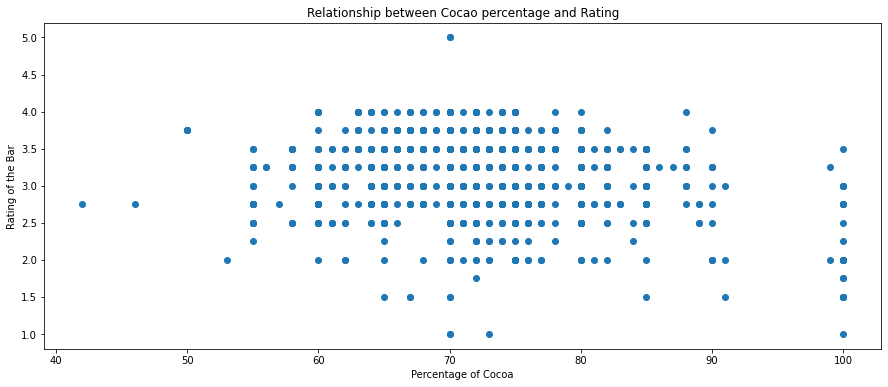

In [14]:
plt.subplots(figsize=(15, 6))
plt.scatter(x="Cocoa_Percent", y="Rating", data=df_chocolate)
plt.title("Relationship between Cocao percentage and Rating")
plt.xlabel('Percentage of Cocoa')
plt.ylabel('Rating of the Bar')
plt.show()

## Percent of Cocoa with the highest and most consumer ratings

## Count of Chocolate Bar Ratings

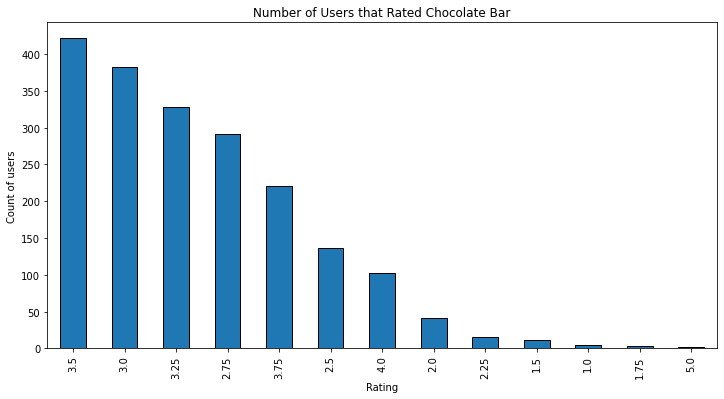

In [15]:


ax = df_chocolate['Rating'].value_counts().plot(kind='bar',figsize=(12,6),title="Number of Users that Rated Chocolate Bar"
                                        ,edgecolor='black' )

ax.set_xlabel("Rating")
ax.set_ylabel("Count of users")
plt.show()


### The most number of ratings that were given was between 3.0 to 3.5, with the highest being 3.5 with a number of around 380 ratings. This shows us that most individuals are giving chocolate bars a rating of a little bit more than satisfactory. 

##  What percent of Cocoa has the highest and most consumer ratings ?

## Count of Cocoa Percentage

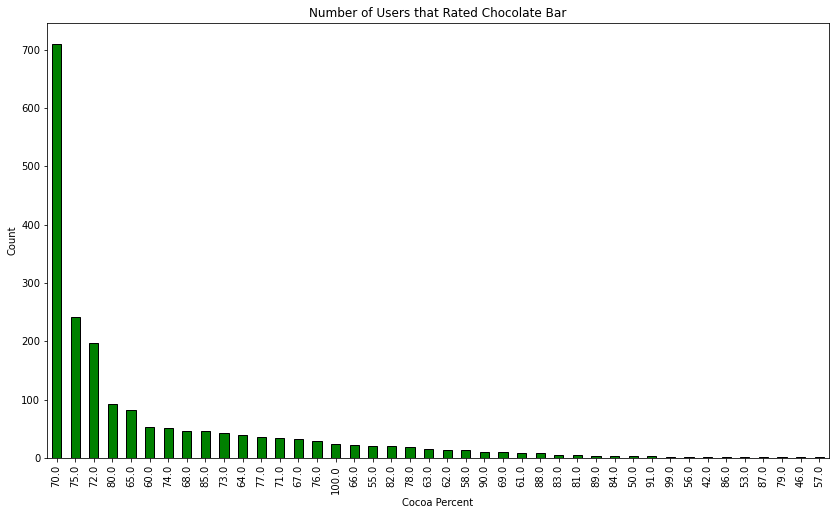

In [16]:
ax = df_chocolate['Cocoa_Percent'].value_counts().plot(kind='bar',figsize=(14,8),title="Number of Users that Rated Chocolate Bar"
                                        ,color = "green"
                                                       ,edgecolor='black' )

ax.set_xlabel("Cocoa Percent")
ax.set_ylabel("Count")
plt.show()


### The graph shows us,most chocolate bars are made with around 70 to 75% cocoa in the bar. With close to 700 chocolate bars being made with 70% cocoa. Less than one hundred bars are made with 60% or less cocoa, and the number is even smaller for chocolate bars with 80% or higher cocoa in them. 

## What percent of Cocoa has the highest and most consumer ratings ?

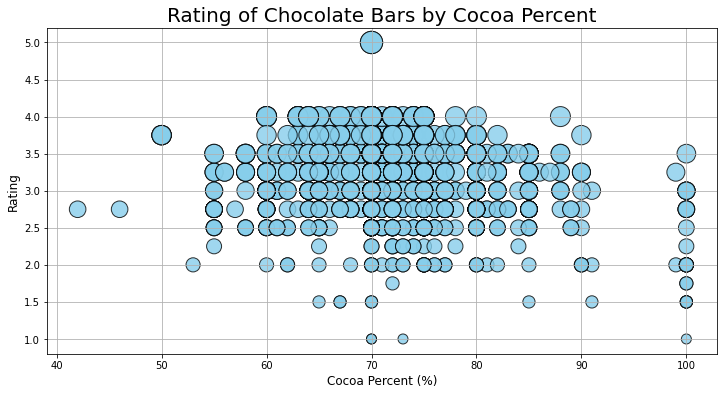

In [17]:
# Build the scatter charts for each city type.
plt.subplots(figsize=(12, 6))
plt.scatter(df_chocolate['Cocoa_Percent'].tolist(),
      df_chocolate['Rating'],
      s=100*df_chocolate['Rating'], c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8)

# Incorporate the other graph properties
plt.title("Rating of Chocolate Bars by Cocoa Percent", fontsize=20)
plt.ylabel("Rating", fontsize=12)
plt.xlabel("Cocoa Percent (%)", fontsize=12)
plt.grid(True)


# Show the plot
plt.show()

### The data shows that a large proportion of chocolate bars are made with 60–80% cocoa, with a large proportion being made with 70% cocoa. Of the 70% cocoa, most are rated between 3.0 to 4.0, telling us that people are more likely to enjoy chocolate bars that are around 70% cocoa.

## How can you compare the maximum cocoa percentage to the cocoa percentage that is most used in chocolate bars?

In [18]:
cocoa_100_percent = df_chocolate[df_chocolate['Cocoa_Percent'] == 100  ]
cocoa_100_percent.head()

,Company,Bean_Origin_or_Bar_Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad_Bean_Origin,Ingredients,Most_Memorable_Characteristics,country_code,latitude,longitude,continent
144,Artisan du Chocolat,Venezuela,486,2010,100.0,England,1.75,missing,Venezuela,Unknown,"very nutty, very bitter",VE,6.423750,-66.589730,South America
268,Bonnat,One Hundred,81,2006,100.0,France,1.50,missing,Unknown,Unknown,"acidic, bitter, dry",ZZ,0.000000,0.000000,Unknown
272,Bouga Cacao (Tulicorp),"El Oro, Hacienda de Oro",341,2009,100.0,Ecuador,1.50,Forastero,Ecuador,Unknown,"cardboard, very bitter, floral",EC,-1.831239,-78.183406,South America
358,C-Amaro,Ecuador,1185,2013,100.0,Italy,3.50,missing,Ecuador,1- B,"fatty, controlled bitter, fruit",EC,-1.831239,-78.183406,South America
474,Claudio Corallo,Principe,252,2008,100.0,Sao Tome,1.00,Forastero,Sao Tome & Principe,Unknown,missing,ST,0.186360,6.613081,Africa


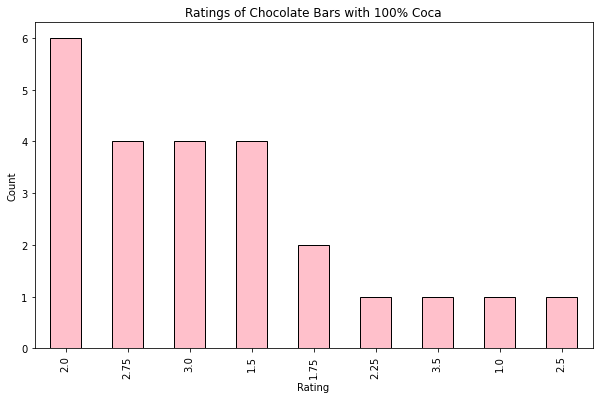

In [19]:
ax = cocoa_100_percent['Rating'].value_counts().plot(kind='bar',figsize=(10,6),title="Ratings of Chocolate Bars with 100% Coca"
                                        ,color = "pink"
                                                       ,edgecolor='black' )

ax.set_xlabel("Rating")
ax.set_ylabel("Count")
plt.show()

### We wanted to find out how consumers are rating chocolate bars that have 100% cocoa. Arounf 20 chocolate bars had a percentage of 100% cocoa, all originating from different parts of the world. As Bar graph shows us, most consumers do not refer chocolate bars that have 100% cocoa in them. At most, they are rating it more around 3.0(satisfactory).


In [20]:
cocoa_70_percent = df_chocolate[df_chocolate['Cocoa_Percent'] == 70 ]
cocoa_70_percent.head()

,Company,Bean_Origin_or_Bar_Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad_Bean_Origin,Ingredients,Most_Memorable_Characteristics,country_code,latitude,longitude,continent
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,missing,Togo,"4- B,S,C,L","burnt wood, earthy, choco",TG,8.619543,0.824782,Africa
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,missing,Togo,"4- B,S,C,L","roasty, acidic, nutty",TG,8.619543,0.824782,Africa
3,A. Morin,Akata,1680,2015,70.0,France,3.50,missing,Togo,"4- B,S,C,L","mild profile, chocolaty, spice",TG,8.619543,0.824782,Africa
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,missing,Peru,"4- B,S,C,L","grainy texture, cocoa, sweet",PE,-9.189967,-75.015152,South America
5,A. Morin,Carenero,1315,2014,70.0,France,2.75,Criollo,Venezuela,Unknown,missing,VE,6.423750,-66.589730,South America


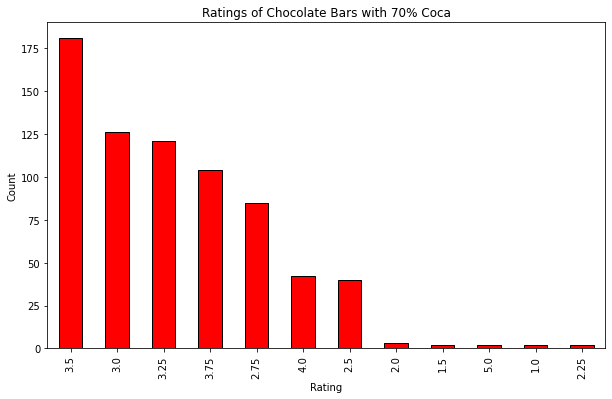

In [21]:
ax = cocoa_70_percent['Rating'].value_counts().plot(kind='bar',figsize=(10,6),title="Ratings of Chocolate Bars with 70% Coca"
                                        ,color = "red"
                                                       ,edgecolor='black' )

ax.set_xlabel("Rating")
ax.set_ylabel("Count")
plt.show()

### We observed that the mean amount of cocoa percent that was used is 70%. We saw that around 650 chocolate bars are made with 70% cocoa in them. We already observed that most individuals rate chocolate bars with 70% cocoa with a rating of 3.5 (above satisfactory)